#K-Means Clustering Tutorial

*source*: https://www.datacamp.com/tutorial/k-means-clustering-python

In [8]:
# import necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# import the dataset

home_data = pd.read_csv("housing.csv", usecols = ['latitude', 'longitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='latitude', ylabel='longitude'>

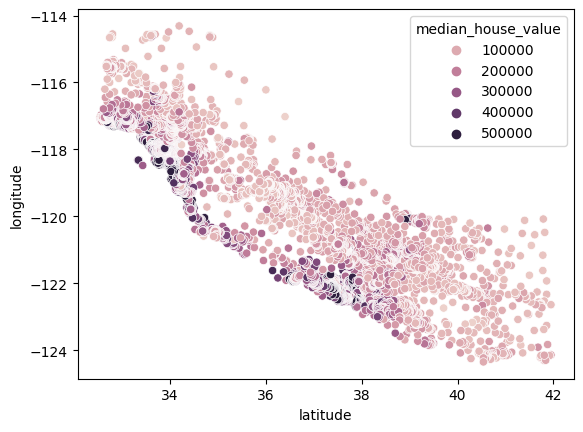

In [5]:
# visualize the data using scatter plot
sns.scatterplot(data = home_data, x = 'latitude', y = 'longitude', hue = 'median_house_value')

In [7]:
# split the data to train and test samples
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size = 0.33, random_state = 0)

In [9]:
# normalize train and test samples
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [10]:
# initialize kmeans algorithm with 3 clusters (chosen randomly)

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

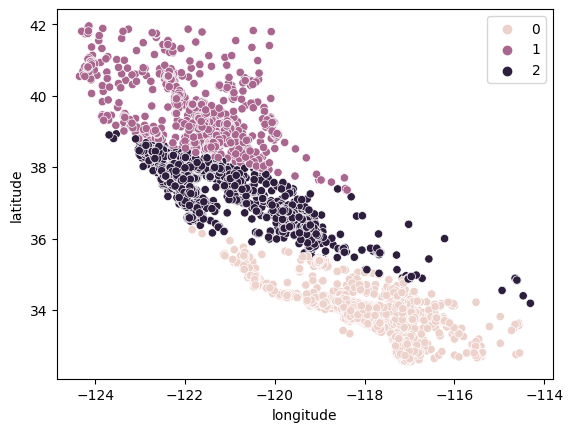

In [11]:
# visualize the clusters
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

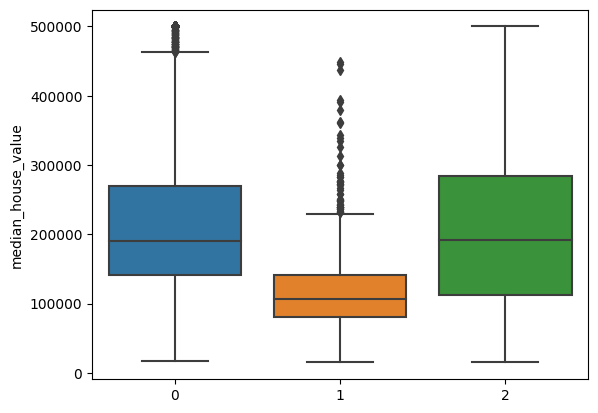

In [12]:
# we wil be using boxplot to visualize the distribution of house prices in these clusters
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [13]:
# checking the silhouette score of the cluster (lower the better)
silhouette_score(X_train_norm, kmeans.labels_, metric = 'euclidean')

0.7499371920703546

In [14]:
# try to loop different K values to determine right number of clusters

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='longitude', ylabel='latitude'>

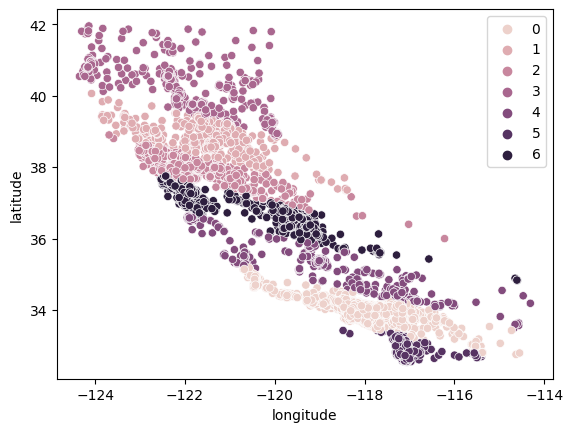

In [17]:
# visualize different clusters

sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[-1].labels_)

<Axes: >

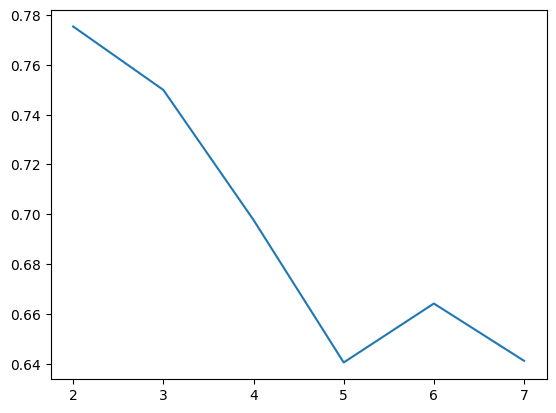

In [18]:
# elbow plot 

sns.lineplot(x = K, y = score)

<Axes: xlabel='longitude', ylabel='latitude'>

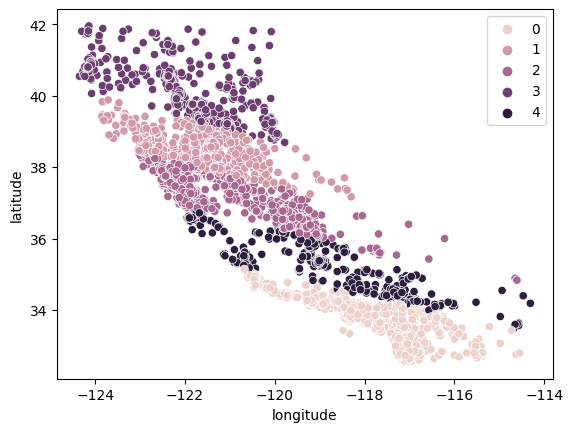

In [19]:
# we can see from above graph that K=5 is a good fit for data
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

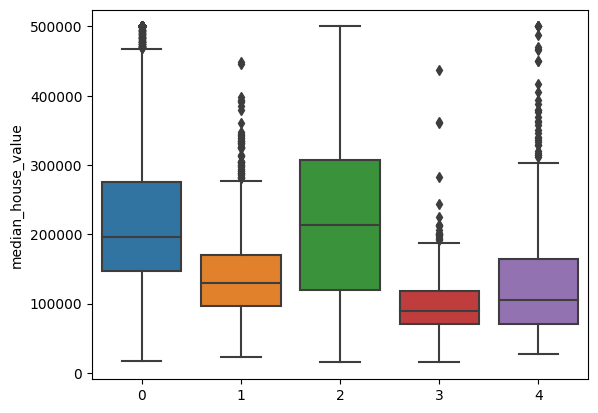

In [20]:
# price distribution for K=5
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])